<a href="https://colab.research.google.com/github/rhs329/boostcourse-3-/blob/main/3_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df=pd.read_csv("/content/diabetes.csv")
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#나이

In [ ]:
# One=Hot-Encoding
df["Age_low"] = df["Age"] < 25
df["Age_middle"] = (df["Age"] >= 25) & (df["Age"] <= 60)
df["Age_high"] = df["Age"] > 60
df[["Age", "Age_low", "Age_middle", "Age_high"]].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<Axes: xlabel='Age_low', ylabel='count'>

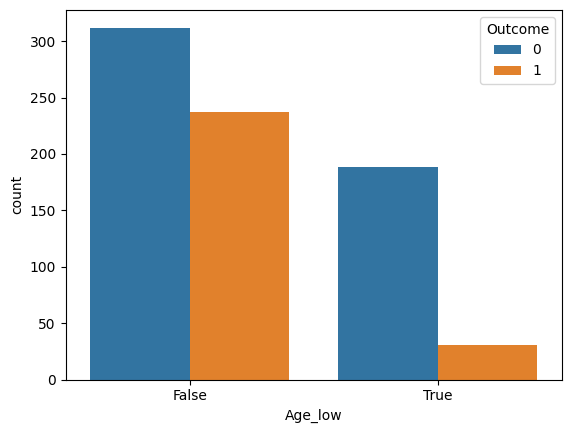

In [ ]:
sns.countplot(data=df, x = "Age_low", hue = "Outcome")

In [ ]:
split_count = int(df.shape[0] * 0.8)
split_count

614

In [ ]:
train = df[:split_count].copy()
train.shape

(614, 12)

In [ ]:
test = df[split_count:].copy()
test.shape

(154, 12)

In [ ]:
feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names.remove("Age")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age_low',
 'Age_middle',
 'Age_high']

In [ ]:
label_name = "Outcome"
label_name

'Outcome'

In [ ]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 9)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age_low,Age_middle,Age_high
0,148,72,35,0,33.6,0.627,False,True,False
1,85,66,29,0,26.6,0.351,False,True,False
2,183,64,0,0,23.3,0.672,False,True,False
3,89,66,23,94,28.1,0.167,True,False,False
4,137,40,35,168,43.1,2.288,False,True,False


In [ ]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 9)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age_low,Age_middle,Age_high
614,138,74,26,144,36.1,0.557,False,True,False
615,106,72,0,0,25.8,0.207,False,True,False
616,117,96,0,0,28.7,0.157,False,True,False
617,68,62,13,15,20.1,0.257,True,False,False
618,112,82,24,0,28.2,1.282,False,True,False


In [ ]:
y_test = test[label_name]

print(y_test.shape)
y_test.head()

(154,)


,Outcome
614,1
615,0
616,0
617,0
618,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1])

[Text(0.5387287787513692, 0.9722222222222222, 'Glucose <= 154.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.1639854874041621, 0.9166666666666666, 'BMI <= 26.35\ngini = 0.385\nsamples = 518\nvalue = [383, 135]'),
 Text(0.3513571330777656, 0.9444444444444444, 'True  '),
 Text(0.03504928806133625, 0.8611111111111112, 'Glucose <= 124.5\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(0.017524644030668127, 0.8055555555555556, 'DiabetesPedigreeFunction <= 0.675\ngini = 0.019\nsamples = 105\nvalue = [104, 1]'),
 Text(0.008762322015334063, 0.75, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(0.02628696604600219, 0.75, 'DiabetesPedigreeFunction <= 0.705\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.017524644030668127, 0.6944444444444444, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03504928806133625, 0.6944444444444444, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.05257393209200438, 0.8055555555555556, 'BloodPressure <= 56.0\ngini = 0.227\ns

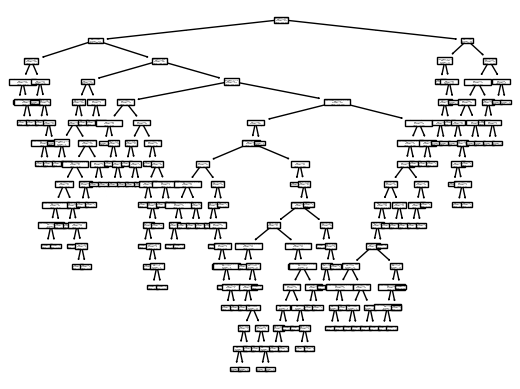

In [ ]:
from sklearn.tree import plot_tree

plot_tree(model, feature_names=feature_names)

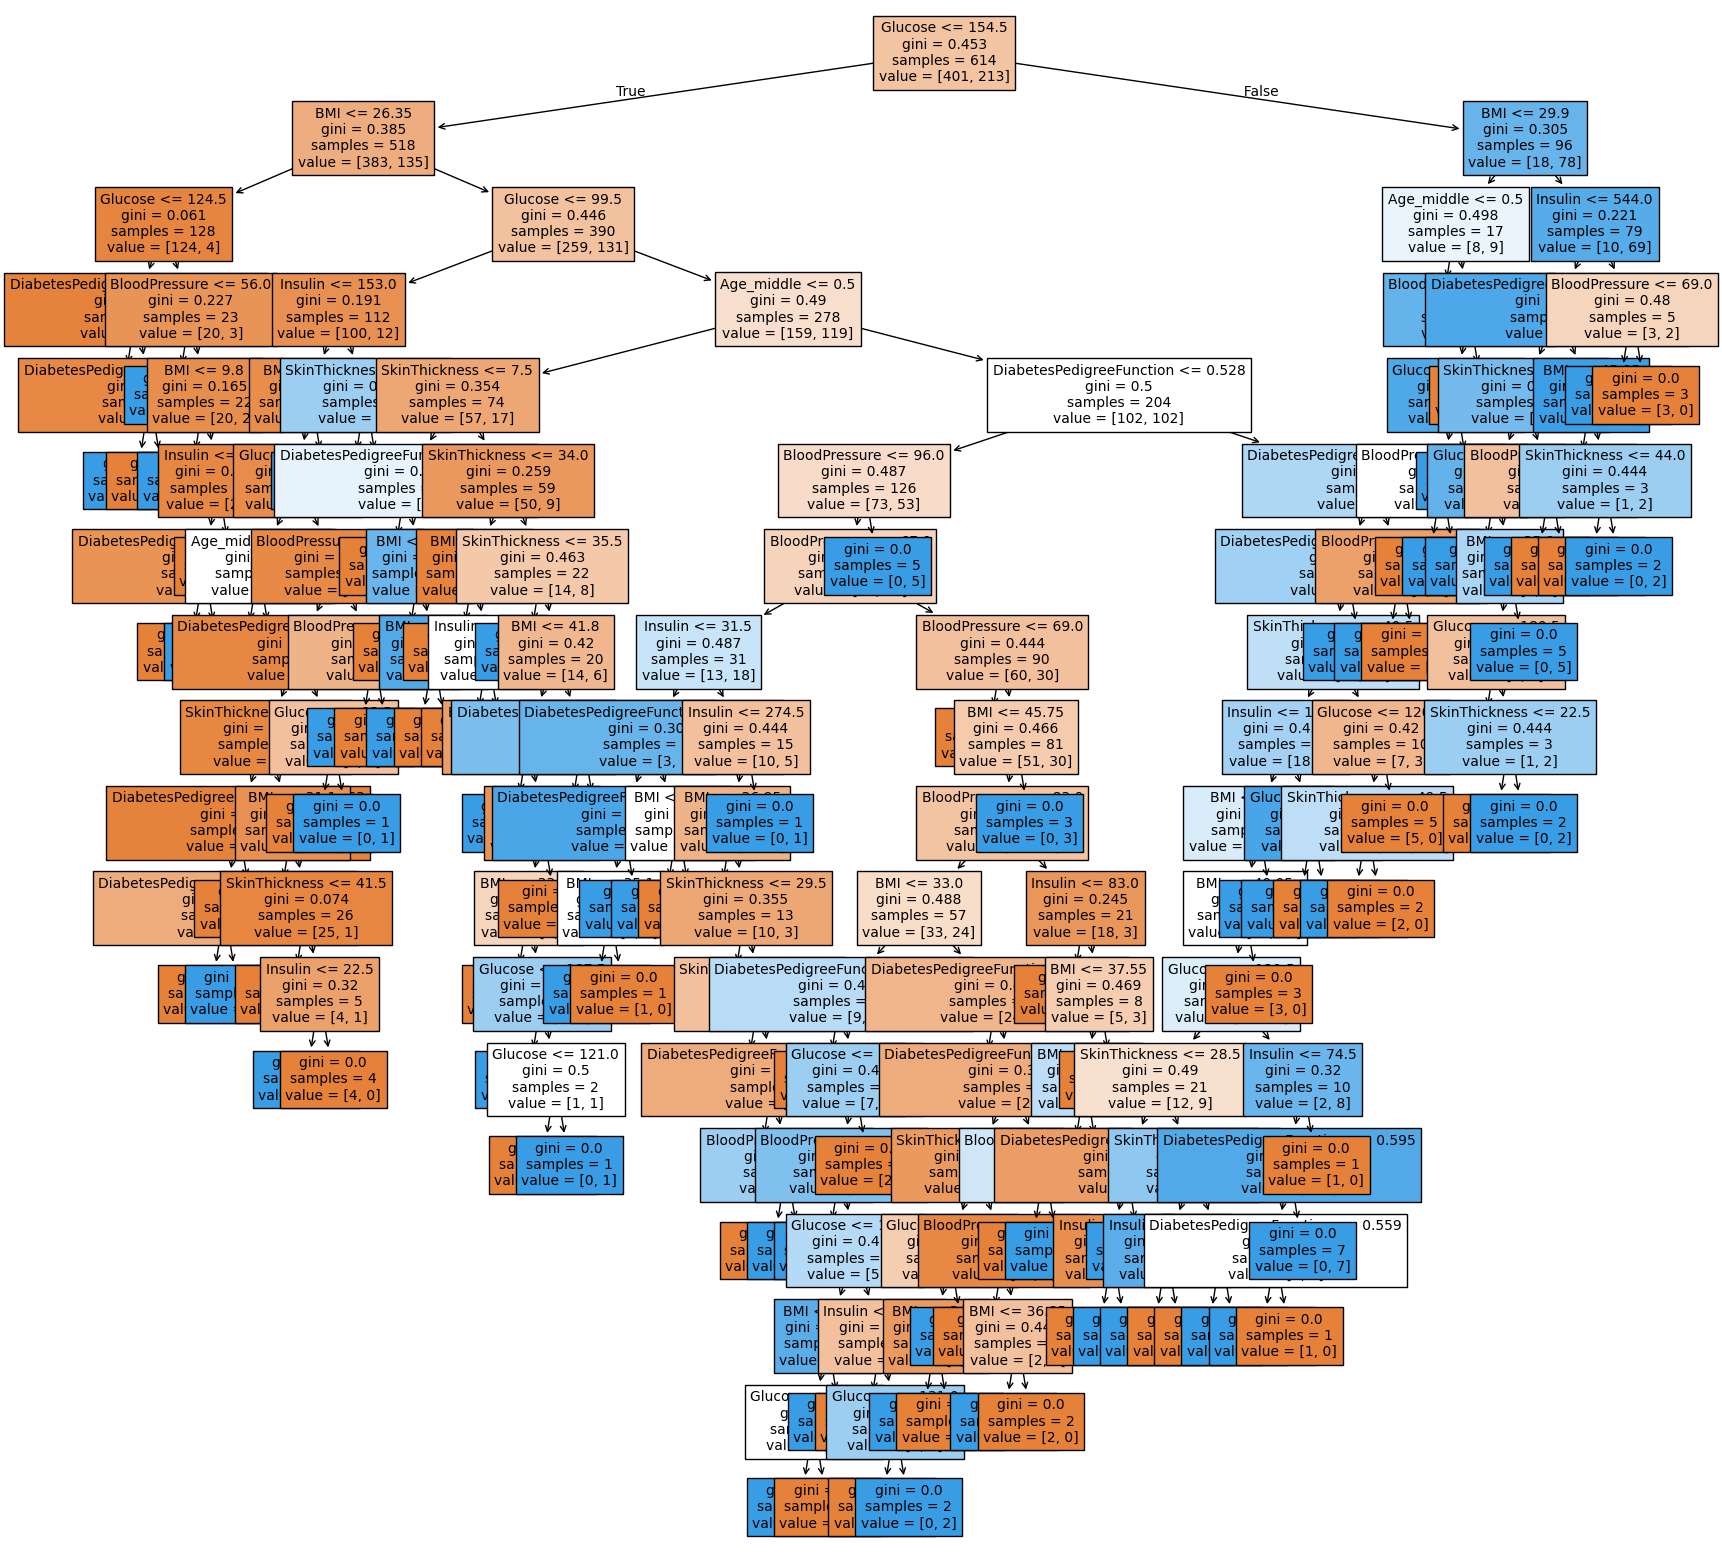

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names=feature_names,
                         filled=True,
                         fontsize=10)

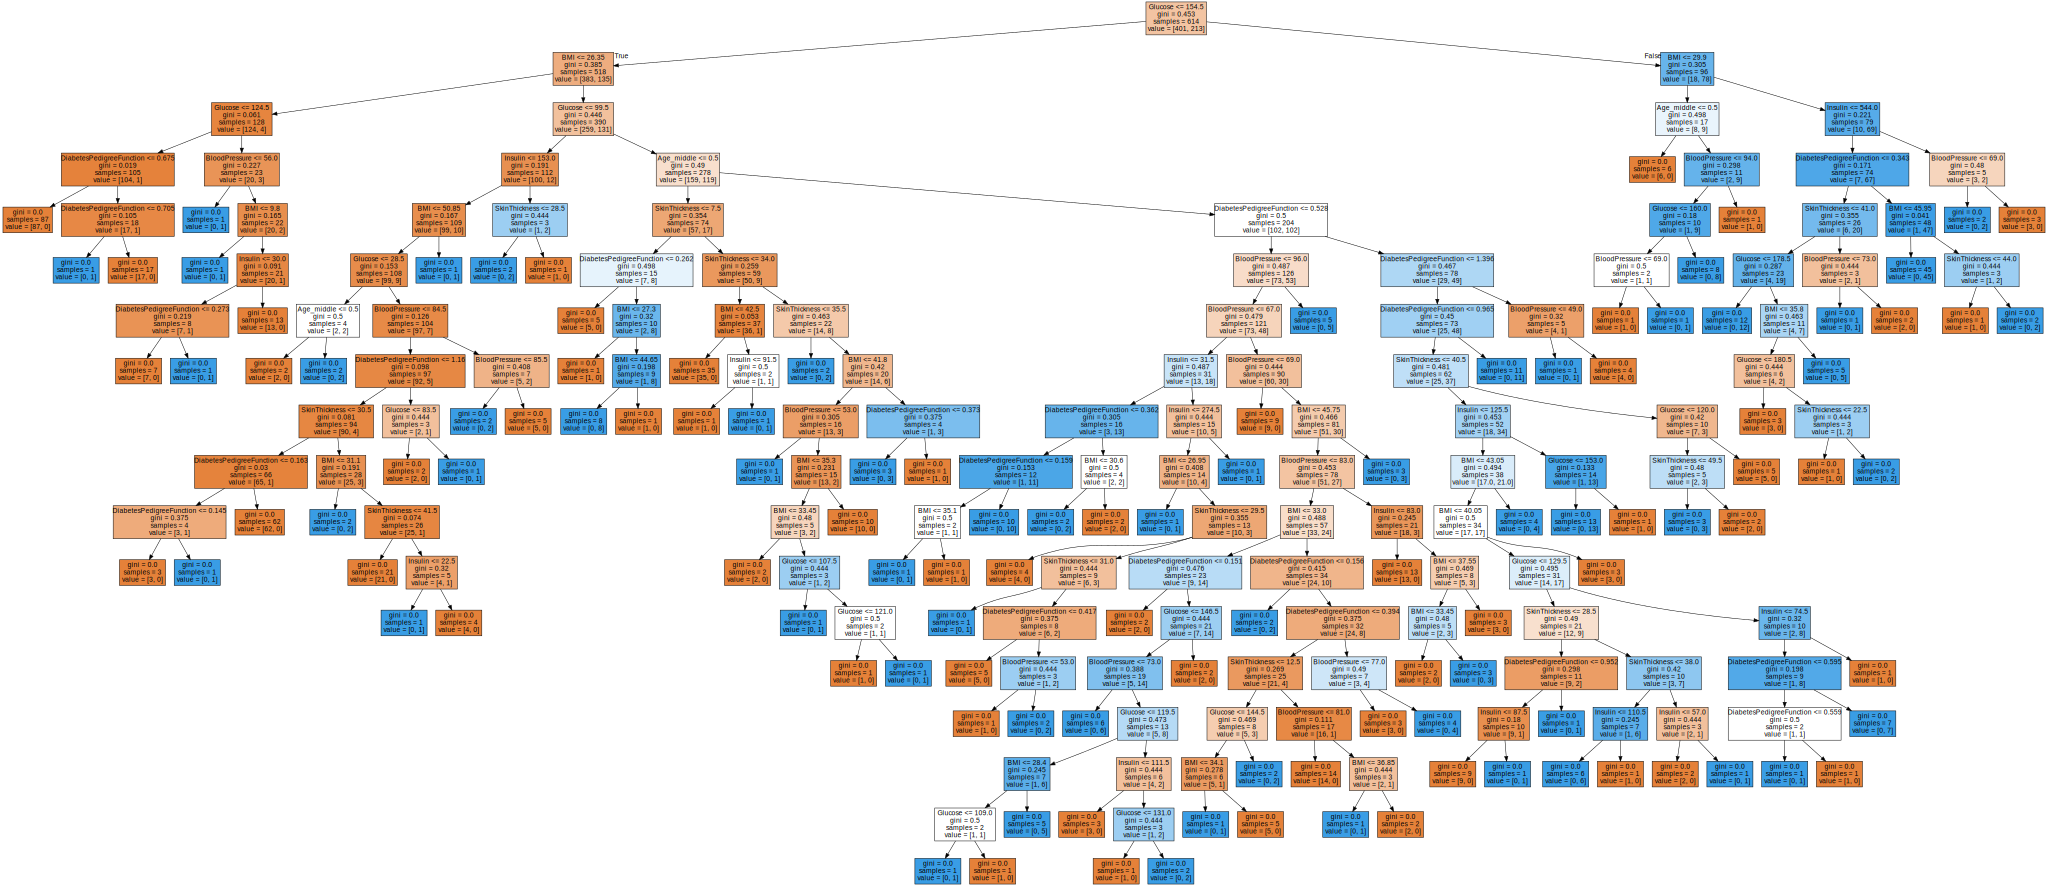

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names = feature_names,
filled=True)
graphviz.Source(dot_tree)

In [ ]:
model.feature_importances_

array([0.31547725, 0.11432602, 0.09161792, 0.08436868, 0.21410145,
       0.12572341, 0.        , 0.05438527, 0.        ])

<Axes: >

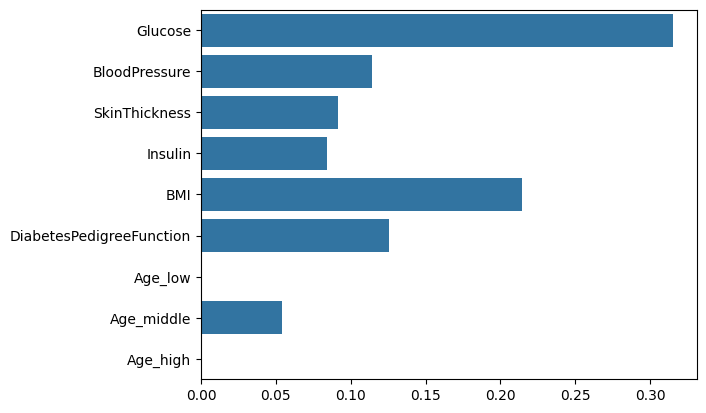

In [ ]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [ ]:
diff_count = abs(y_test - y_predict).sum()
diff_count

np.int64(55)

In [ ]:
y_test == y_predict

,Outcome
614,True
615,True
616,False
617,True
618,True
...,...
763,True
764,True
765,True
766,True


In [ ]:
abs(y_test - y_predict).sum() / len(y_test)

np.float64(0.35714285714285715)

In [ ]:
(len(y_test) - diff_count) / len(y_test) * 100

np.float64(64.28571428571429)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.6428571428571429

In [ ]:
model.score(X_test, y_test) * 100

64.28571428571429